In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [36]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for i_episode in range(1,num_episodes+1):
        state = env.reset()
        episode = []
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        for t in range(100):
            #print_observation(observation)
            action = sample_policy(state)
            #print("Taking action: {}".format( ["Stick", "Hit"][action]))
            #observation, reward, done, _ = env.step(action)
            next_state, reward, done, _ = env.step(action)
            episode.append((state,reward))
            
            if done:
                break
            state = next_state
        states_list = set([x[0] for x in episode]) 
        for state in states_list:
            #first visit
            first_idx = [i for i,x in enumerate(episode) if x[0] == state][0]
            G = sum([x[1]*(discount_factor**i) for i, x in enumerate(episode[first_idx:])])
            returns_sum[state] += G
            returns_count[state] += 1.0
            '''
            #every visit 
            idx_list = [i for i,x in enumerate(episode) if x[0] == state]
            for idx in idx_list:
                G = sum([x[1]*(discount_factor**i) for i, x in enumerate(episode[idx:])])
                #print(G)
                returns_sum[state] += G
                returns_count[state] += 1.0
            '''
            V[state] = returns_sum[state] / returns_count[state]
    return V

In [37]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    #return np.array([1.0, 0.0]) if score >= 20 else np.array([0.0, 1.0])
    return 0 if score >= 20 else 1

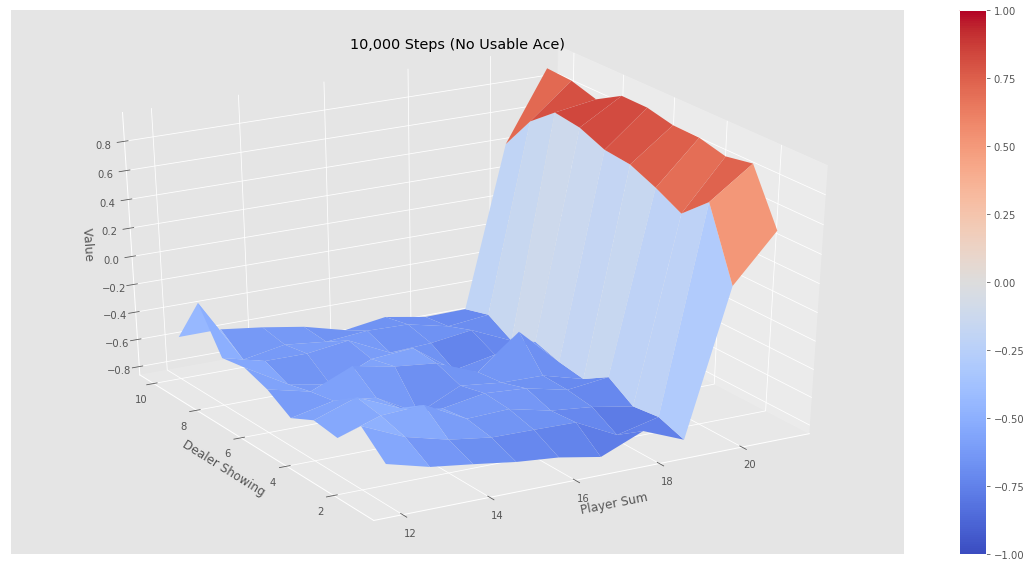

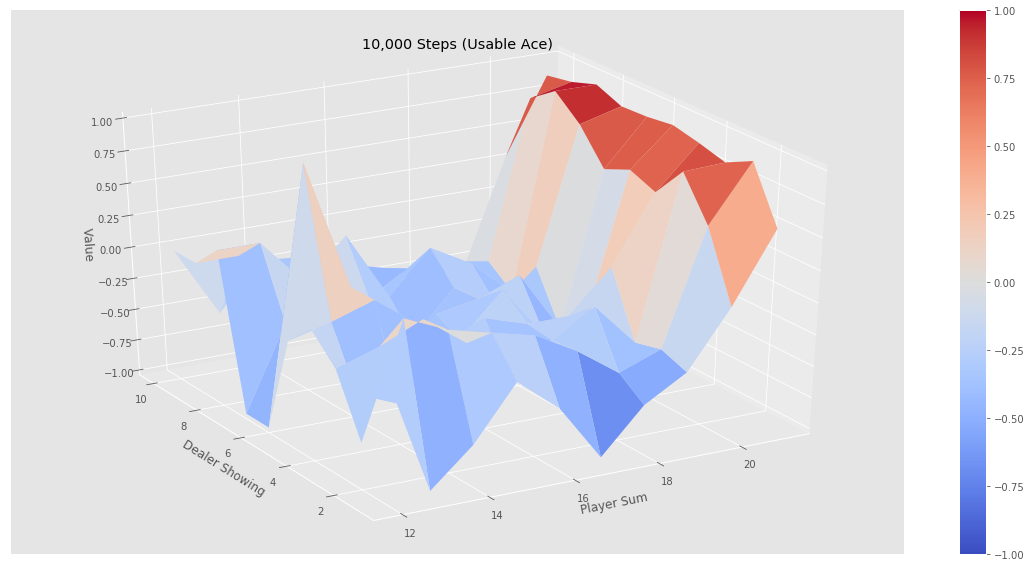

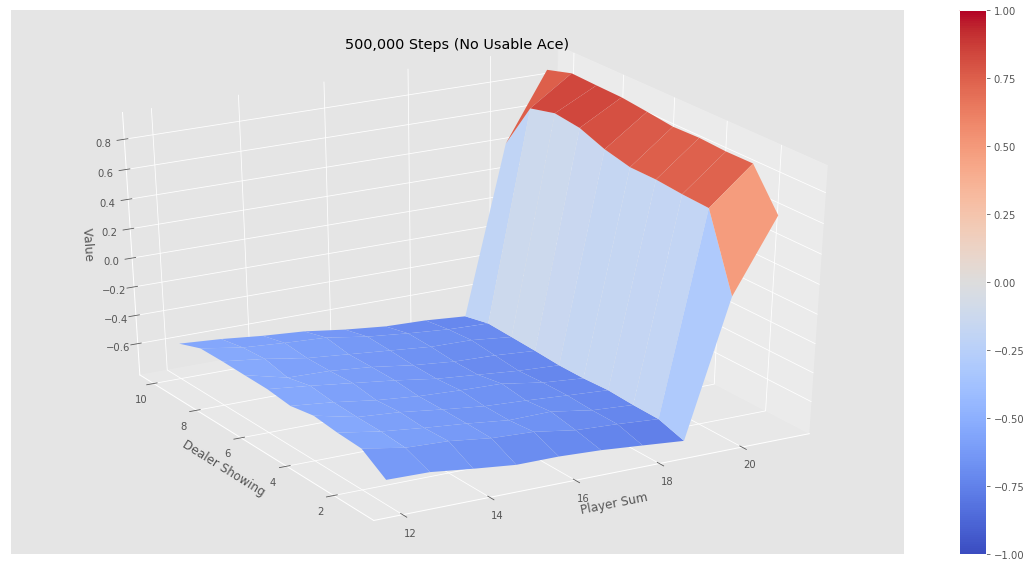

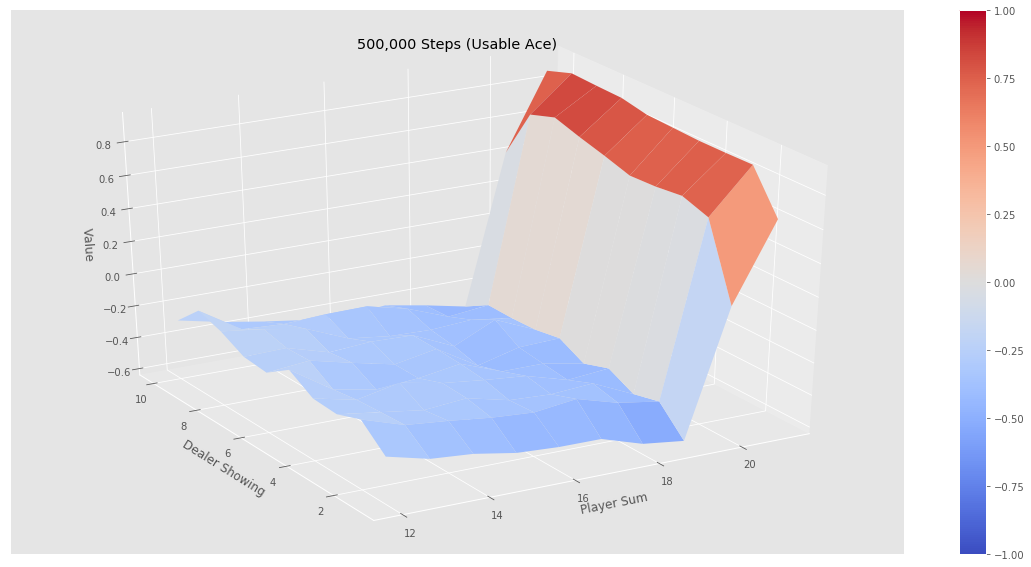

In [38]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")